In [2]:
!pip install lime==0.2.0.1

In [18]:
## Import packages
## Import packages here
import pandas as pd
import numpy as np 
import imblearn
from matplotlib.pyplot import figure
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from imblearn.under_sampling import RandomUnderSampler
from sklearn import metrics
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from collections import Counter

In [57]:
## Import csv file
path = "bank-full.csv"
df = pd.read_csv(path, delimiter = ";")

In [61]:
df.head()

,age,education,balance,day,duration,campaign,pdays,previous,y,job_admin.,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2,2143,5,261,1,-1,0,0,False,...,False,False,True,False,False,False,False,False,False,True
1,44,1,29,5,151,1,-1,0,0,False,...,False,False,True,False,False,False,False,False,False,True
2,33,1,2,5,76,1,-1,0,0,False,...,False,False,True,False,False,False,False,False,False,True
3,47,3,1506,5,92,1,-1,0,0,False,...,False,False,True,False,False,False,False,False,False,True
4,33,3,1,5,198,1,-1,0,0,False,...,False,False,True,False,False,False,False,False,False,True


<Axes: xlabel='y'>

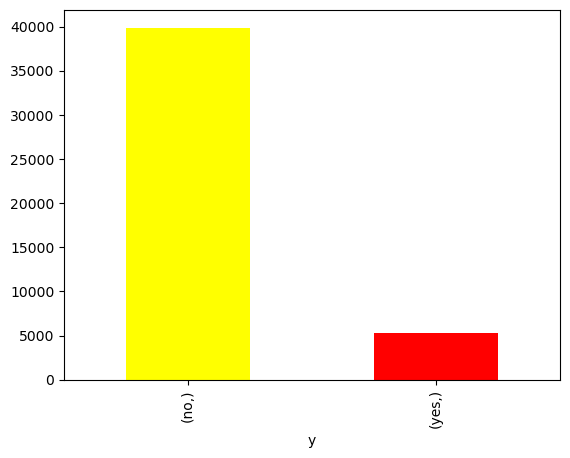

In [59]:
y_train.value_counts().plot.bar(color = ["yellow", "red"])

In [60]:
# Transform categorical variables into numerical ones
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["education"] = le.fit_transform(df["education"])
df["y"] = le.fit_transform(df["y"])

columns = df.columns[(df.dtypes == object) & (~df.columns.isin(["education", "y"]))]
df = pd.get_dummies(df, columns = columns)

In [62]:
# Split the data into train and test data sets
from sklearn.model_selection import train_test_split

feature_columns = [x for x in df.columns if x != "y"]
X_train, X_test, y_train, y_test = train_test_split(df[feature_columns], df["y"], 
                                                   test_size = 0.3, random_state = 42)

In [63]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((31647, 48), (31647,), (13564, 48), (13564,))

<Axes: xlabel='y'>

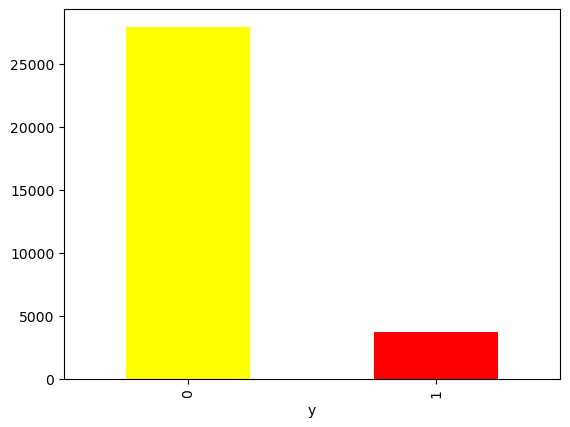

In [67]:
y_train.value_counts().plot.bar(color = ["yellow", "red"])

In [64]:
# Build a simple logistic regression 
rs = 123
lr = LogisticRegression(random_state = rs)

# Train model 
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
accuracy_score(y_test, preds)

0.8992185196107343

In [66]:
# Calculate the precision, recall, f5 given the y_test and predictions
accuracy = accuracy_score(y_test, preds)
precision, recall, fbeta, support = precision_recall_fscore_support(y_test, preds, beta = 5, average = "binary")
auc = roc_auc_score(y_test, preds)
print(f"Accuracy is: {accuracy:.2f}")
print(f"Precision is: {precision:.2f}")
print(f"Recall is: {recall:.2f}")
print(f"Fscore is: {fbeta:.2f}")
print(f"AUC is: {auc:.2f}")

Accuracy is: 0.90
Precision is: 0.64
Recall is: 0.33
Fscore is: 0.34
AUC is: 0.65


In [69]:
# Rebuild a logistic regression using Grid Search
param_grid_lr = {
    "C": [0.1, 1, 10, 100],
    "penalty": ["l1", "l2"]
}

lr = LogisticRegression(random_state = rs)

grid_search_lr = GridSearchCV(estimator = lr, param_grid = param_grid_lr, scoring = "accuracy", cv = 5)
grid_search_lr.fit(X_train, y_train)
best_lr = grid_search_lr.best_estimator_

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [77]:
grid_search_lr.best_params_

{'C': 100, 'penalty': 'l2'}

In [71]:
preds = best_lr.predict(X_test)
accuracy = accuracy_score(y_test, preds)
precision, recall, fbeta, support = precision_recall_fscore_support(y_test, preds, beta = 5, average = "binary")
auc = roc_auc_score(y_test, preds)
print(f"Accuracy is: {accuracy:.2f}")
print(f"Precision is: {precision:.2f}")
print(f"Recall is: {recall:.2f}")
print(f"Fscore is: {fbeta:.2f}")
print(f"AUC is: {auc:.2f}")

Accuracy is: 0.89
Precision is: 0.59
Recall is: 0.22
Fscore is: 0.22
AUC is: 0.60


In [74]:
# Build a more complex model (Random Forest)
param_grid_rf = {
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10], 
    'n_estimators': [50, 100, 200]
}

rf = RandomForestClassifier(bootstrap=True, random_state = rs)
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid_rf, scoring = "accuracy", cv = 5)
grid_search_rf.fit(X_train, y_train)

best_rf = grid_search_rf.best_estimator_

In [80]:
grid_search_rf.best_params_

{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}

In [75]:
preds = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, preds)
precision, recall, fbeta, support = precision_recall_fscore_support(y_test, preds, beta = 5, average = "binary")
auc = roc_auc_score(y_test, preds)
print(f"Accuracy is: {accuracy:.2f}")
print(f"Precision is: {precision:.2f}")
print(f"Recall is: {recall:.2f}")
print(f"Fscore is: {fbeta:.2f}")
print(f"AUC is: {auc:.2f}")

Accuracy is: 0.91
Precision is: 0.68
Recall is: 0.39
Fscore is: 0.40
AUC is: 0.68


In [76]:
# Add class re-weighting 
class_weight = {}
# 0.2 to Non-subscribed class
class_weight[0] = 0.2
# 0.8 to Subscribed class
class_weight[1] = 0.8

In [79]:
# Rebuild Logistic Regression using pre-tuned hyper parameters
weight_lr = LogisticRegression(random_state = rs,
                        C = 100,
                        penalty = "l2",
                       class_weight = class_weight)
weight_lr.fit(X_train, y_train)

preds = weight_lr.predict(X_test)
accuracy = accuracy_score(y_test, preds)
precision, recall, fbeta, support = precision_recall_fscore_support(y_test, preds, beta = 5, average = "binary")
auc = roc_auc_score(y_test, preds)
print(f"Accuracy is: {accuracy:.2f}")
print(f"Precision is: {precision:.2f}")
print(f"Recall is: {recall:.2f}")
print(f"Fscore is: {fbeta:.2f}")
print(f"AUC is: {auc:.2f}")

Accuracy is: 0.86
Precision is: 0.45
Recall is: 0.66
Fscore is: 0.65
AUC is: 0.78


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [82]:
# Rebuild Random Forest Classifier using pre-tuned hyper parameters
weighted_rf = RandomForestClassifier(random_state = rs, 
                                     max_depth= None, 
                                     min_samples_split= 10, 
                               n_estimators = 200,
                               class_weight = class_weight)
weighted_rf.fit(X_train, y_train)

preds = weighted_rf.predict(X_test)
accuracy = accuracy_score(y_test, preds)
precision, recall, fbeta, support = precision_recall_fscore_support(y_test, preds, beta = 5, average = "binary")
auc = roc_auc_score(y_test, preds)
print(f"Accuracy is: {accuracy:.2f}")
print(f"Precision is: {precision:.2f}")
print(f"Recall is: {recall:.2f}")
print(f"Fscore is: {fbeta:.2f}")
print(f"AUC is: {auc:.2f}")

Accuracy is: 0.91
Precision is: 0.59
Recall is: 0.62
Fscore is: 0.61
AUC is: 0.78
